In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.idvscript import idvscript

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
BATTOL_WEIGHTS_PATH = "/path/to/mask_rcnn_idv_0017.h5"  # TODO: update this path

C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
Using TensorFlow backend.


In [2]:

config =idvscript.IDVConfig()
BOTTLE_DIR ="D:\\Mask\\MaskRCNN_Image_Segmentation\\samples\\idvscript\\dataset"


In [3]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.9

config = InferenceConfig()
config.display()





# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                19
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [4]:

# Load validation dataset
dataset = idvscript.IDVDataset()
dataset.load_idv(BOTTLE_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))


Images: 91
Classes: ['BG', '1', '2', '3', '4', '5', '6']


# Img

In [6]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
weights_path = "D:\\Mask\\MaskRCNN_Image_Segmentation\\mask_rcnn_idv_0017.h5"

print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

import numpy as np
import cv2
import mrcnn.config
import mrcnn.utils
from mrcnn.model import MaskRCNN
from pathlib import Path


def get_car_boxes(boxes, class_ids):
    car_boxes = []

    for i, box in enumerate(boxes):
        # If the detected object isn't a car / truck, skip it
        car_boxes.append(box)

    return np.array(car_boxes)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

# Video file or camera to process - set this to 0 to use your webcam instead of a video file
VIDEO_SOURCE = "D:\\Mask\\MaskRCNN_Image_Segmentation\\samples\\idvscript\\dataset\\val\\AC (4).jpg"



# Location of parking spaces
parked_car_boxes = None

# Load the video file we want to run detection on
frame = cv2.imread(VIDEO_SOURCE)


    # Convert the image from BGR color (which OpenCV uses) to RGB color
rgb_image = frame[:, :, ::-1]

    # Run the image through the Mask R-CNN model to get results.
results = model.detect([rgb_image], verbose=0)

    # Mask R-CNN assumes we are running detection on multiple images.
    # We only passed in one image to detect, so only grab the first result.
r = results[0]

print(r['class_ids'])


car_boxes = get_car_boxes(r['rois'], r['class_ids'])

print("found in frame of :")

    # Draw each box on the frame
for box in car_boxes:
    print("ob: ", box)

    y1, x1, y2, x2 = box

        # Draw the box
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    if r['class_ids'] in [1]:
        BC="AC"
        cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)
    
    elif r['class_ids'] in [2]:
        BC="bottle"
        cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)
    
    elif r['class_ids'] in [3]:
        BC="laptop"
        cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)
    
    elif r['class_ids'] in [4]:
        BC="mobile"
        cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)
    
    elif r['class_ids'] in [5]:
        BC="Shoe"
        cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)
    
    elif r['class_ids'] in [6]:
        BC="watch"
        cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)  


    # Show the frame of video on the screen
    cv2.imshow('Video', frame)

    
cv2.waitKey(0)
cv2.destroyAllWindows()


W0913 11:51:39.978961 18796 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0913 11:51:39.981954 18796 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0913 11:51:39.985943 18796 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0913 11:51:40.007886 18796 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is depre

Loading weights  D:\Mask\MaskRCNN_Image_Segmentation\mask_rcnn_idv_0017.h5


C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[1]
found in frame of :
ob:  [ 380  138  700 1021]


# Vid

In [5]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
weights_path = "D:\\Mask\\MaskRCNN_Image_Segmentation\\mask_rcnn_idv_0017.h5"

print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

import numpy as np
import cv2
import mrcnn.config
import mrcnn.utils
from mrcnn.model import MaskRCNN
from pathlib import Path
def get_bottle_boxes(boxes, class_ids):
    bottle_boxes = []


    for i, box in enumerate(boxes):
        # If the detected object isn't a bottle , skip it
        bottle_boxes.append(box)
        
    return np.array(bottle_boxes)


# Location of empty spaces
empty_bottle_boxes = None

# How many frames of video we've seen in a row with a space open
free_space_frames = 0

# Video file or camera to process - set this to 0 to use your webcam instead of a video file
VIDEO_SOURCE = "C:\\Users\\bidhan.roy\\Downloads\\vid\\n4.mp4"

# Load the video file we want to run detection on
video_capture = cv2.VideoCapture(VIDEO_SOURCE)


# Loop over each frame of video
while video_capture.isOpened():
    success, frame = video_capture.read()
    if not success:
        break

    # Convert the image from BGR color (which OpenCV uses) to RGB color
    rgb_image = frame[:, :, ::-1]

    # Run the image through the Mask R-CNN model to get results.
    results = model.detect([rgb_image], verbose=0)

    # Mask R-CNN assumes we are running detection on multiple images.
    # We only passed in one image to detect, so only grab the first result.
    r = results[0]
    

    if empty_bottle_boxes is None:
        # This is the first frame of video - assume all the bottles detected are in  spaces.
        # Save the location of each bottle as a  space box and go to the next frame of video.
        empty_bottle_boxes = get_bottle_boxes(r['rois'], r['class_ids'])
    else:
        # We already know where the spaces are. Check if any are currently unoccupied.

        # Get where bottles are currently located in the frame
        bottle_boxes = get_bottle_boxes(r['rois'], r['class_ids'])

        # See how much those bottles overlap with the known spaces
        overlaps = mrcnn.utils.compute_overlaps(empty_bottle_boxes, bottle_boxes)

        # Assume no spaces are free until we find one that is free
        free_space = False

        # Loop through each known space box
        for  empting_area, overlap_areas in zip(empty_bottle_boxes, overlaps):

            # For this parking space, find the max amount it was covered by any
            # bottle that was detected in our image (doesn't really matter which bottle)
            max_IoU_overlap = np.max(overlap_areas)

            # Get the top-left and bottom-right coordinates of the parking area
            y1, x1, y2, x2 =  empting_area

            # Check if the  empting space is occupied by seeing if any bottle overlaps
            # it by more than 0.15 using IoU
            if max_IoU_overlap < 0.15:
                #  empting space not occupied! Draw a green box around it
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, 'BC' , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)
                if r['class_ids'] in [1]:
                    BC="AC"
                    cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)

                elif r['class_ids'] in [2]:
                    BC="bottle"
                    cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)

                elif r['class_ids'] in [3]:
                    BC="laptop"
                    cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)

                elif r['class_ids'] in [4]:
                    BC="mobile"
                    cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)

                elif r['class_ids'] in [5]:
                    BC="Shoe"
                    cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)

                elif r['class_ids'] in [6]:
                    BC="watch"
                    cv2.putText(frame, BC , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0),3,lineType=cv2.LINE_AA)  

                # Flag that we have seen at least one open space
                
                
                free_space = True
            else:
                #  empting space is still occupied - draw a red box around it
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
                
                


            # Write the IoU measurement inside the box
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, f"{max_IoU_overlap:0.2}", (x1 + 6, y2 - 6), font, 0.3, (255, 255, 255))

        # If at least one space was free, start counting frames
        # This is so we don't alert based on one frame of a spot being open.
        # This helps prevent the script triggered on one bad detection.
        if free_space:
            free_space_frames += 1
        else:
            # If no spots are free, reset the count
            free_space_frames = 0

        # If a space has been free for several frames, we are pretty sure it is really free!
        if free_space_frames > 5:
            # Write Empty!! at the top of the screen
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, f"Empty!", (7, 450), font, 3.0, (0, 255, 0), 2, cv2.FILLED)
            



        # Show the frame of video on the screen
        cv2.imshow('Video', frame)

    # Hit 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Clean up everything when finished
video_capture.release()
cv2.destroyAllWindows()

W0917 12:58:00.932851 14184 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 12:58:01.086441 14184 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 12:58:01.160423 14184 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 12:58:01.287359 14184 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is depre

Loading weights  D:\Mask\MaskRCNN_Image_Segmentation\mask_rcnn_idv_0017.h5


C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
weights_path = "D:\\Mask\\MaskRCNN_Image_Segmentation\\mask_rcnn_idv_0017.h5"

print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

import numpy as np
import cv2
import mrcnn.config
import mrcnn.utils
from mrcnn.model import MaskRCNN
from pathlib import Path


def get_car_boxes(boxes, class_ids):
    car_boxes = []

    for i, box in enumerate(boxes):
        # If the detected object isn't a car / truck, skip it
        car_boxes.append(box)

    return np.array(car_boxes)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

# Video file or camera to process - set this to 0 to use your webcam instead of a video file
VIDEO_SOURCE = "D:\\Mask\\MaskRCNN_Image_Segmentation\\samples\\idvscript\\dataset\\val\\shoe (10).jpg"



# Location of parking spaces
parked_car_boxes = None

# Load the video file we want to run detection on
frame = cv2.imread(VIDEO_SOURCE)


    # Convert the image from BGR color (which OpenCV uses) to RGB color
rgb_image = frame[:, :, ::-1]

    # Run the image through the Mask R-CNN model to get results.
results = model.detect([rgb_image], verbose=0)

r = results[0]

   

    # Filter the results to only grab the car / truck bounding boxes
car_boxes = get_car_boxes(r['rois'], r['class'])

print("found in frame of :")

    # Draw each box on the frame
for box in car_boxes:
    print("ob: ", box)

    y1, x1, y2, x2 = box

        # Draw the box
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
     

    # Show the frame of video on the screen
    cv2.imshow('Video', frame)

    # Hit 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Clean up everything when finished
video_capture.release()
cv2.destroyAllWindows()


Loading weights  D:\Mask\MaskRCNN_Image_Segmentation\mask_rcnn_idv_0017.h5


KeyError: 'class'

In [11]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [12]:
os.getcwd()

'D:\\Mask\\MaskRCNN_Image_Segmentation'

Processing 1 images
image                    shape: (340, 510, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 19)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[3]


AttributeError: 'list' object has no attribute 'shape'

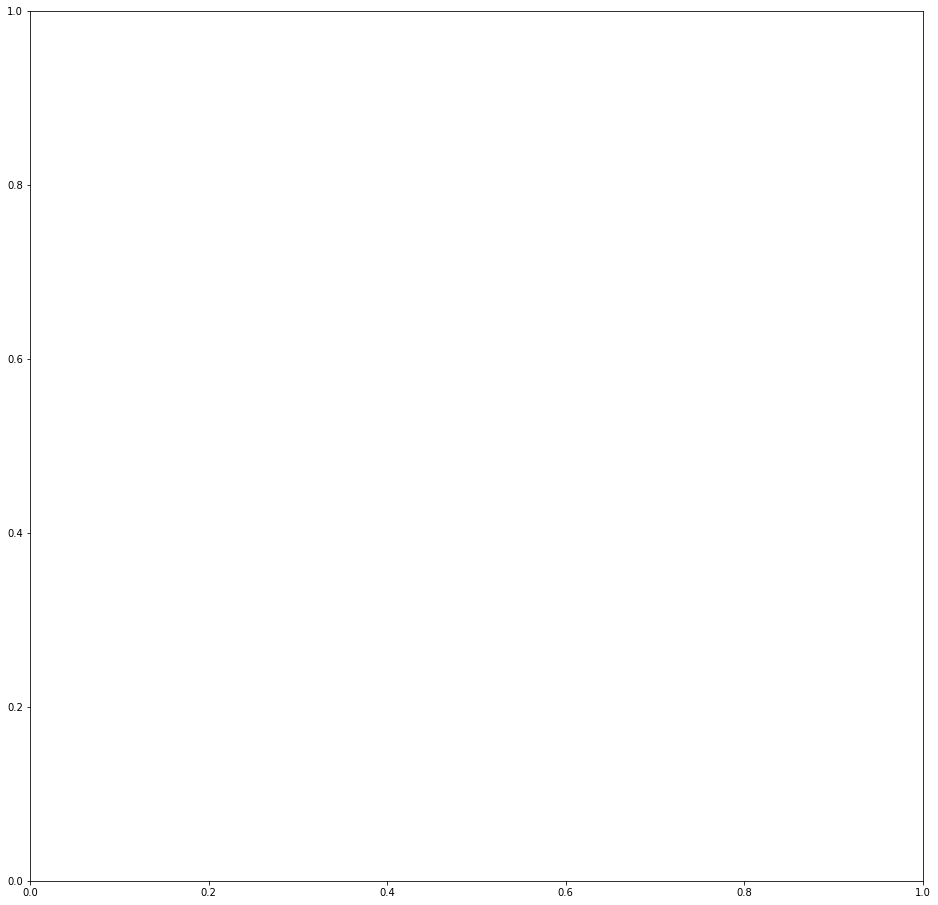

In [34]:
image= cv2.imread("D:\\Mask\\MaskRCNN_Image_Segmentation\\samples\\idvscript\\dataset\\val\\laptop (7).jpg")

#print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, dataset.image_reference(image_id)))

        # Run object detection
results = model.detect([image], verbose=1)
print(r['class_ids'])
if r['class_ids'] in [3]:
    BC="Lap"
        # Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], BC ,dataset.class_names, r['scores'], ax=ax,title="Predictions")



In [ ]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
weights_path = "D:\\Mask\\MaskRCNN_Image_Segmentation\\mask_rcnn_idv_0017.h5"

print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

import numpy as np
import cv2
import mrcnn.config
import mrcnn.utils
from mrcnn.model import MaskRCNN
from pathlib import Path
def get_bottle_boxes(boxes, class_ids):
    bottle_boxes = []


    for i, box in enumerate(boxes):
        # If the detected object isn't a bottle , skip it
        bottle_boxes.append(box)
        
    return np.array(bottle_boxes)


# Location of empty spaces
empty_bottle_boxes = None

# How many frames of video we've seen in a row with a space open
free_space_frames = 0

# Video file or camera to process - set this to 0 to use your webcam instead of a video file
VIDEO_SOURCE = "C:\\Users\\bidhan.roy\\Downloads\\vid\\n4.mp4"

# Load the video file we want to run detection on
video_capture = cv2.VideoCapture(VIDEO_SOURCE)


# Loop over each frame of video
while video_capture.isOpened():
    success, frame = video_capture.read()
    if not success:
        break

    # Convert the image from BGR color (which OpenCV uses) to RGB color
    rgb_image = frame[:, :, ::-1]

    # Run the image through the Mask R-CNN model to get results.
    results = model.detect([rgb_image], verbose=0)

    # Mask R-CNN assumes we are running detection on multiple images.
    # We only passed in one image to detect, so only grab the first result.
    r = results[0]
    

    if empty_bottle_boxes is None:
        # This is the first frame of video - assume all the bottles detected are in  spaces.
        # Save the location of each bottle as a  space box and go to the next frame of video.
        empty_bottle_boxes = get_bottle_boxes(r['rois'], r['class_ids'])
    else:
        # We already know where the spaces are. Check if any are currently unoccupied.

        # Get where bottles are currently located in the frame
        bottle_boxes = get_bottle_boxes(r['rois'], r['class_ids'])

        # See how much those bottles overlap with the known spaces
        overlaps = mrcnn.utils.compute_overlaps(empty_bottle_boxes, bottle_boxes)

        # Assume no spaces are free until we find one that is free
        free_space = False

        # Loop through each known space box
        for  empting_area, overlap_areas in zip(empty_bottle_boxes, overlaps):

            # For this parking space, find the max amount it was covered by any
            # bottle that was detected in our image (doesn't really matter which bottle)
            max_IoU_overlap = np.max(overlap_areas)

            # Get the top-left and bottom-right coordinates of the parking area
            y1, x1, y2, x2 =  empting_area

            # Check if the  empting space is occupied by seeing if any bottle overlaps
            # it by more than 0.15 using IoU
            if max_IoU_overlap < 0.15:
                #  empting space not occupied! Draw a green box around it
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Flag that we have seen at least one open space
                
                
                free_space = True
            else:
                #  empting space is still occupied - draw a red box around it
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)

            # Write the IoU measurement inside the box
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, f"{max_IoU_overlap:0.2}", (x1 + 6, y2 - 6), font, 0.3, (255, 255, 255))

        # If at least one space was free, start counting frames
        # This is so we don't alert based on one frame of a spot being open.
        # This helps prevent the script triggered on one bad detection.
        if free_space:
            free_space_frames += 1
        else:
            # If no spots are free, reset the count
            free_space_frames = 0

        # If a space has been free for several frames, we are pretty sure it is really free!
        if free_space_frames > 5:
            # Write Empty!! at the top of the screen
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, f"Empty!", (7, 450), font, 3.0, (0, 255, 0), 2, cv2.FILLED)


        # Show the frame of video on the screen
        cv2.imshow('Video', frame)

    # Hit 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Clean up everything when finished
video_capture.release()
cv2.destroyAllWindows()

W0912 15:41:25.463088 18076 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0912 15:41:25.469162 18076 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0912 15:41:25.475289 18076 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0912 15:41:25.511252 18076 deprecation_wrapper.py:119] From C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is depre

Loading weights  D:\Mask\MaskRCNN_Image_Segmentation\mask_rcnn_idv_0017.h5


C:\Users\bidhan.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
